###### Alef Segura Santos, 9762942 | Gustavo de Moura Souza, 9762981 | Yago Rafael Pessoa, 9896218
# Visualização Computacional - SCC0252


## Base e Descrição

In [344]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# leitura do dataset e renomeação de algumas colunas para evitar problemas de manipulação.
df = pd.read_csv('dataset.csv', sep=";")
df.rename(index=str, columns={"continente":"Continente",
                              "direitos de propriedade":"Direitos Propriedade",
                              "Gasto do Governo":"Gasto Governo",
                              "Liberdade de negócio":"Liberdade Negócio",
                              "Liberdade de trabalho":"Liberdade Trabalho",
                              "Liberdade de Investimento":"Liberdade Investimento",
                              "Liberdade de comércio exterior":"Liberdade com. exterior"},
                              inplace=True)
                              
# descrição geral das colunas do conjunto de dados
df.describe()

,Direitos Propriedade,Eficácia Judicial,Liberdade Fiscal,Gasto Governo,Liberdade Negócio,Liberdade Trabalho,Liberdade Monetária,Liberdade com. exterior,Liberdade Investimento,Liberdade Financeira
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,43.579545,40.767045,77.682955,61.418182,64.943750,60.943182,74.089205,74.890341,52.500000,49.034091
std,24.218633,21.059840,12.162647,23.820193,17.548514,16.514328,8.988548,11.153412,23.476432,19.054178
min,5.000000,0.000000,39.600000,0.000000,10.000000,20.000000,0.000000,33.400000,0.000000,10.000000
25%,30.000000,25.000000,71.350000,46.650000,54.000000,49.525000,71.750000,68.075000,35.000000,30.000000
50%,40.000000,32.500000,79.100000,66.350000,65.900000,61.750000,75.450000,76.900000,55.000000,50.000000
75%,60.000000,51.000000,85.525000,80.350000,76.675000,73.750000,79.300000,85.000000,70.000000,60.000000
max,95.000000,95.000000,99.900000,96.800000,99.900000,95.500000,90.600000,90.000000,95.000000,90.000000


# Visualizações iniciais

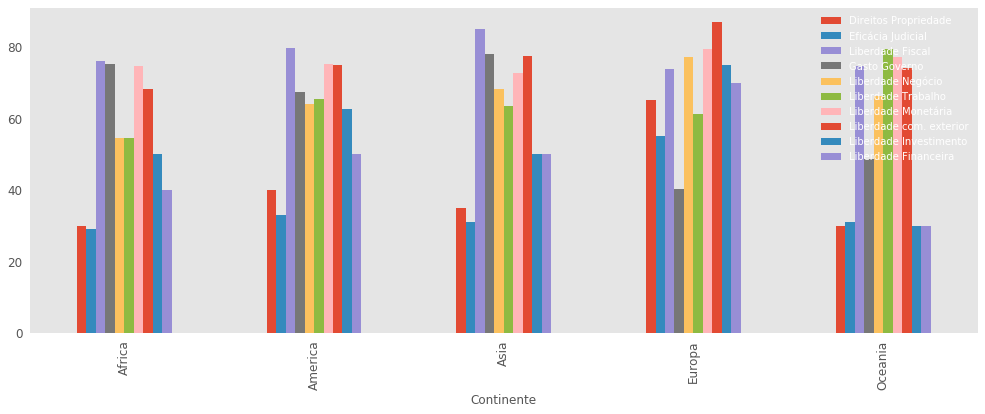

In [352]:
data = df.groupby(by='Continente').median()
data.plot(kind='bar', figsize=(17,6), grid=False, fontsize=12, sort_columns=True)

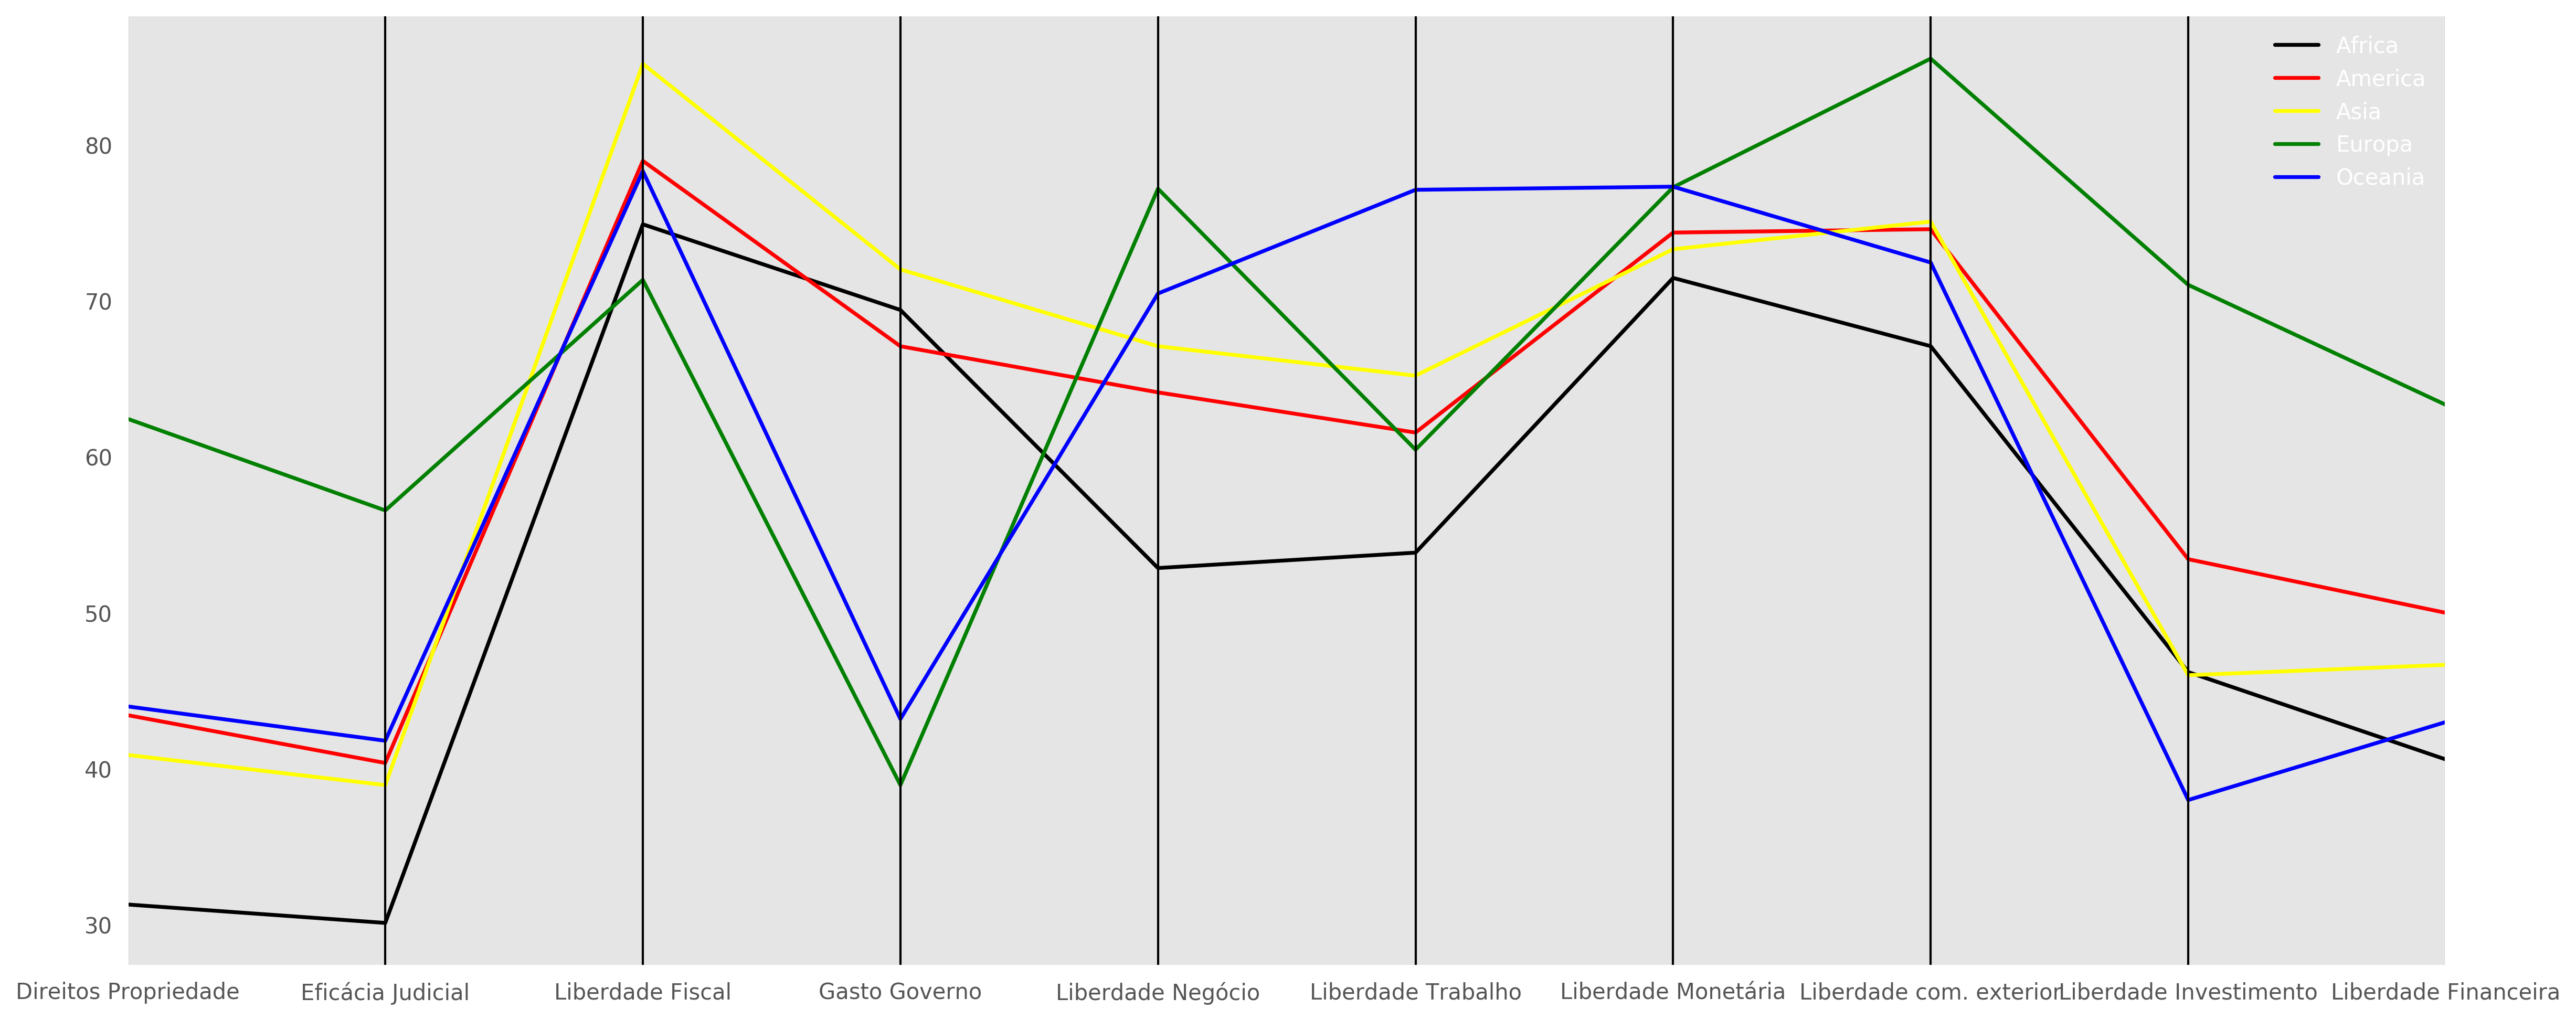

In [355]:
data = df.groupby('Continente').mean()
data['Continente'] = df.Continente.copy()
for idx in data.index:
    data.loc[idx,'Continente'] = idx

plt.figure(figsize=(19, 8), dpi=300)
pd.plotting.parallel_coordinates(data, 'Continente', cols=data.columns[:10],
                                 color=['black', 'red', 'yellow', 'green', 'blue'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f860c144da0>,
      dtype=object)

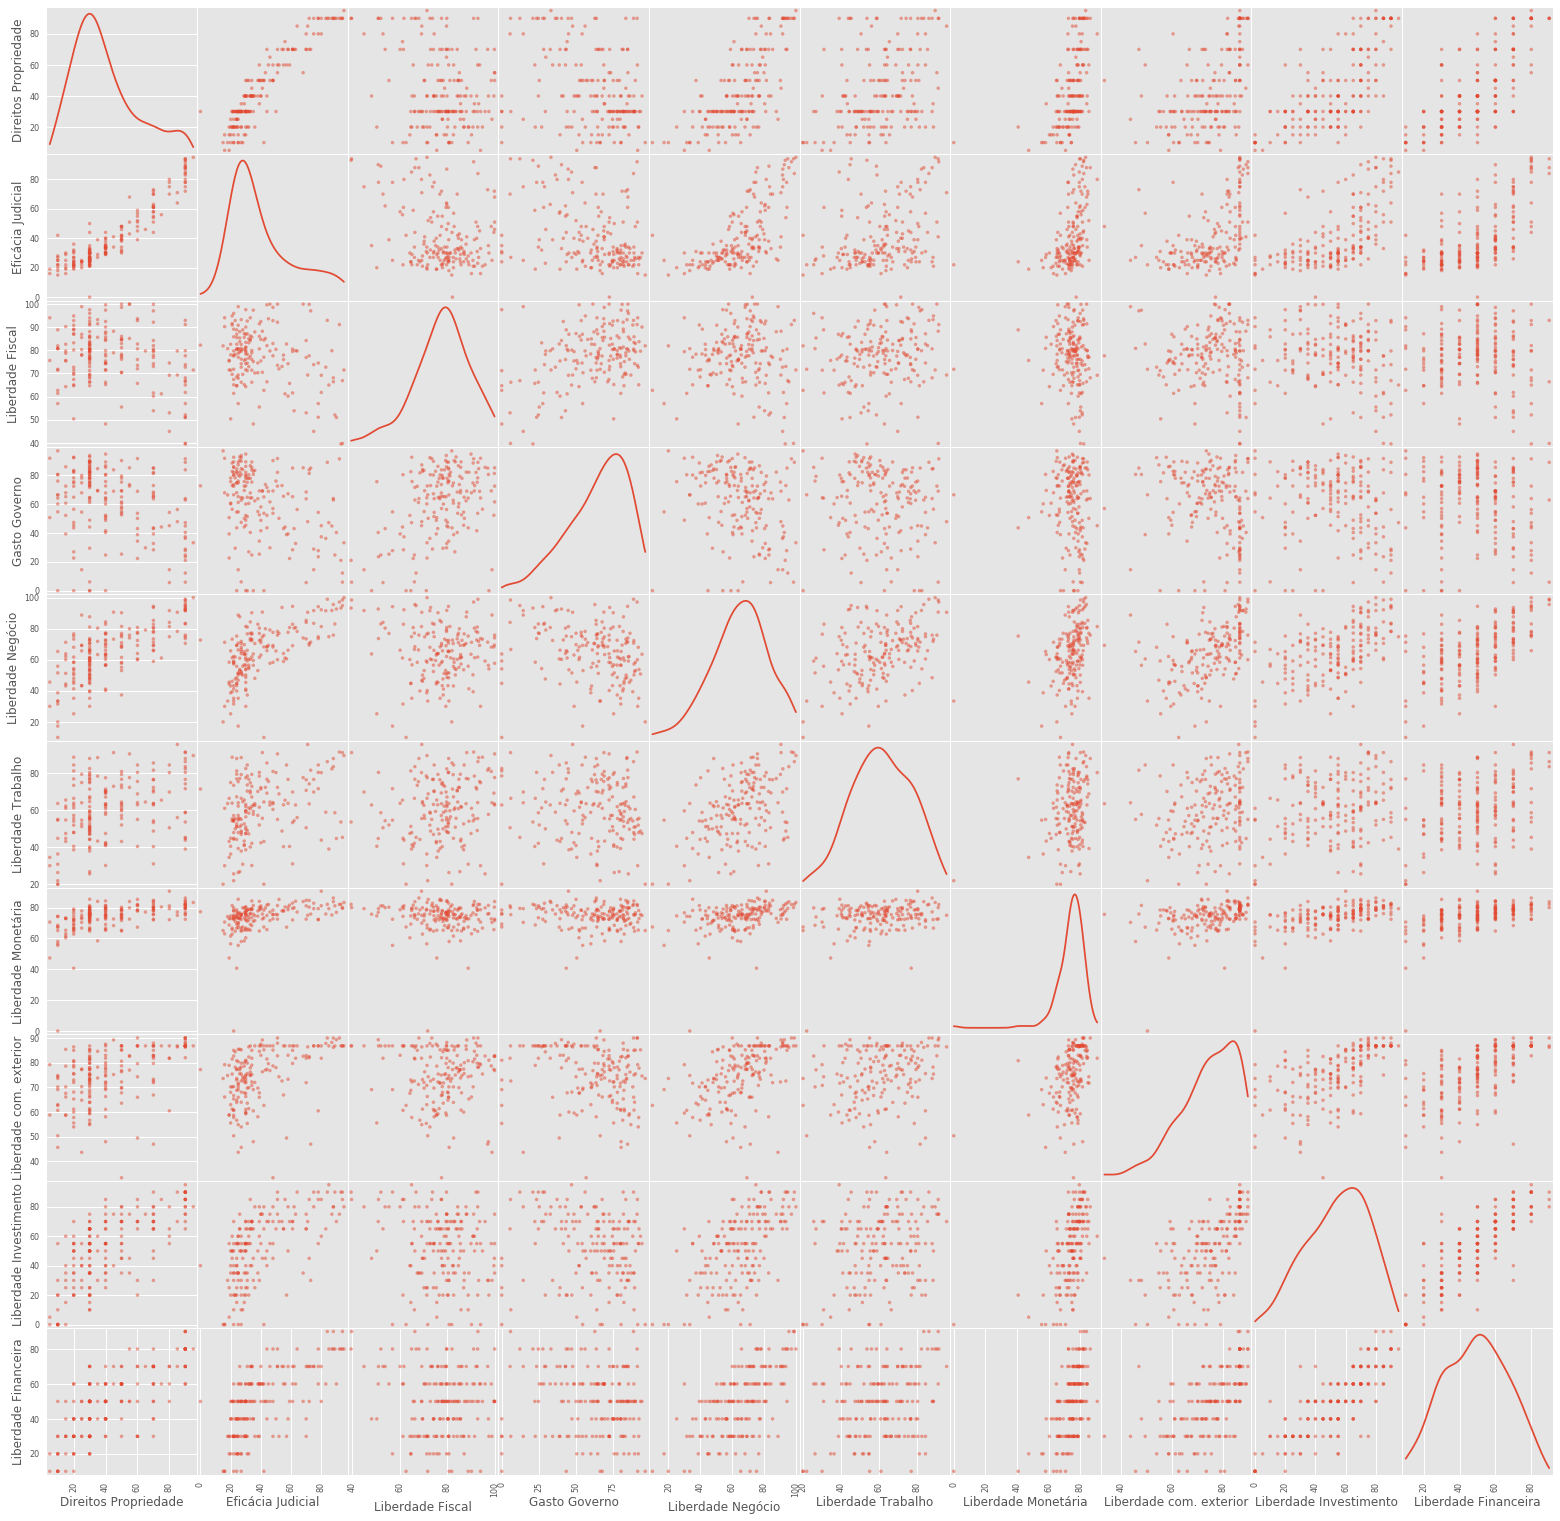

In [360]:
plt.style.use('ggplot')
pd.plotting.scatter_matrix(df, figsize=(27,27), diagonal='kde', grid=False)

# Principal Component Analysis (PCA)

In [363]:
# Normalizando o dataset para a aplicação do PCA.
df_scaled = pd.DataFrame(scale(df.iloc[:, 2:]), index=df.index, columns=df.columns[2:])
df_scaled['Continente'] = df.Continente.copy()
df_scaled['País'] = df['País'].copy()

# Dataset normalizado.
df_scaled.describe()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by the scale function.



,Direitos Propriedade,Eficácia Judicial,Liberdade Fiscal,Gasto Governo,Liberdade Negócio,Liberdade Trabalho,Liberdade Monetária,Liberdade com. exterior,Liberdade Investimento,Liberdade Financeira
count,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02
mean,6.055762e-17,6.055762e-17,-2.800790e-16,4.440892e-16,-4.642751e-16,-1.009294e-16,-4.844610e-16,1.211152e-15,2.523234e-17,1.614870e-16
std,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00
min,-1.597514e+00,-1.941295e+00,-3.140074e+00,-2.585765e+00,-3.139896e+00,-2.486326e+00,-8.266139e+00,-3.730582e+00,-2.242666e+00,-2.054429e+00
25%,-5.623062e-01,-7.508144e-01,-5.221744e-01,-6.217547e-01,-6.254075e-01,-6.933833e-01,-2.609852e-01,-6.127977e-01,-7.475552e-01,-1.001796e+00
50%,-1.482230e-01,-3.936702e-01,1.168404e-01,2.076343e-01,5.464726e-02,4.899504e-02,1.518241e-01,1.806974e-01,1.067936e-01,5.083740e-02
75%,6.799435e-01,4.872853e-01,6.466042e-01,7.970478e-01,6.704112e-01,7.777099e-01,5.813689e-01,9.090046e-01,7.475552e-01,5.771540e-01
max,2.129235e+00,2.582531e+00,1.831874e+00,1.489609e+00,1.997661e+00,2.098506e+00,1.842111e+00,1.358577e+00,1.815491e+00,2.156104e+00


### Execução do PCA e variância cumulativa de cada componente

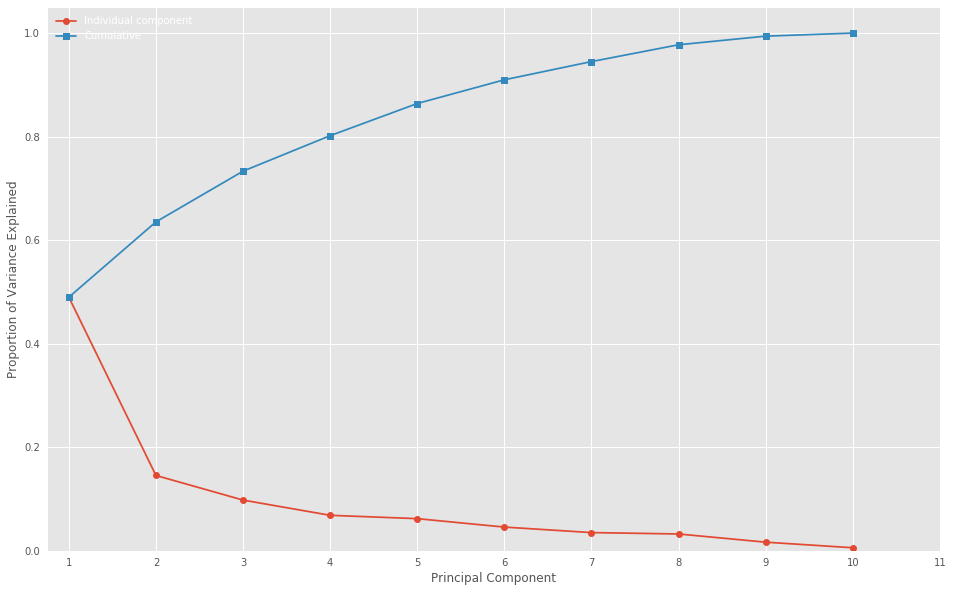

In [364]:
pca = PCA()
pca.fit_transform(df_scaled.iloc[:, :-2])
plt.figure(figsize=(16, 10))

plt.plot(np.arange(1,pca.n_components_+1), pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(np.arange(1,pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks(np.arange(1,pca.n_components_+2))
plt.legend(loc=2);

In [365]:
# Aplicando o PCA para a geração do gráfico dos dois primeiros componentes.
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(df.iloc[:, 2:]),
                       columns=['PC'+str(i+1) for i in range(10)], index=df.index)

# The loading vectors
pca_loadings = pd.DataFrame(pca.fit(df_scaled.iloc[:, :-2]).components_.T, index=df_scaled.columns[:-2],
                            columns=['PC'+str(i+1) for i in range(pca.n_components_)])
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Direitos Propriedade,-0.414033,0.081286,0.061156,-0.132445,0.322398,0.096037,-0.090607,0.291683,0.075602,0.767150
Eficácia Judicial,-0.389484,0.160199,0.106505,-0.098126,0.387161,0.123744,-0.240820,0.416107,0.105455,-0.627854
Liberdade Fiscal,0.110358,-0.686459,0.191208,0.275065,0.012711,0.531333,0.171313,0.272496,0.135197,-0.004013
Gasto Governo,0.153008,-0.582100,-0.357534,-0.259311,0.433932,-0.374184,-0.324839,-0.090588,-0.023555,-0.009130
Liberdade Negócio,-0.357865,-0.089221,0.272140,0.158490,0.216165,0.264916,-0.229996,-0.764540,-0.098154,-0.028829
Liberdade Trabalho,-0.202835,-0.284696,0.699932,-0.249540,-0.252151,-0.502329,0.067705,0.056260,0.035755,-0.026250
Liberdade Monetária,-0.283005,-0.162286,-0.274009,-0.584970,-0.548606,0.357703,-0.206056,-0.028467,-0.052158,-0.037291
Liberdade com. exterior,-0.309444,-0.114684,-0.196619,0.625971,-0.373946,-0.255944,-0.474665,0.167256,-0.018624,0.040262
Liberdade Investimento,-0.381715,-0.084208,-0.314350,0.052642,-0.008053,-0.165519,0.462431,-0.195423,0.678401,-0.076773
Liberdade Financeira,-0.387975,-0.148559,-0.209773,0.075736,0.080821,-0.098820,0.509742,0.068214,-0.700088,-0.082184


# Visualização das variáveis dos dois primeiros componentes gerados

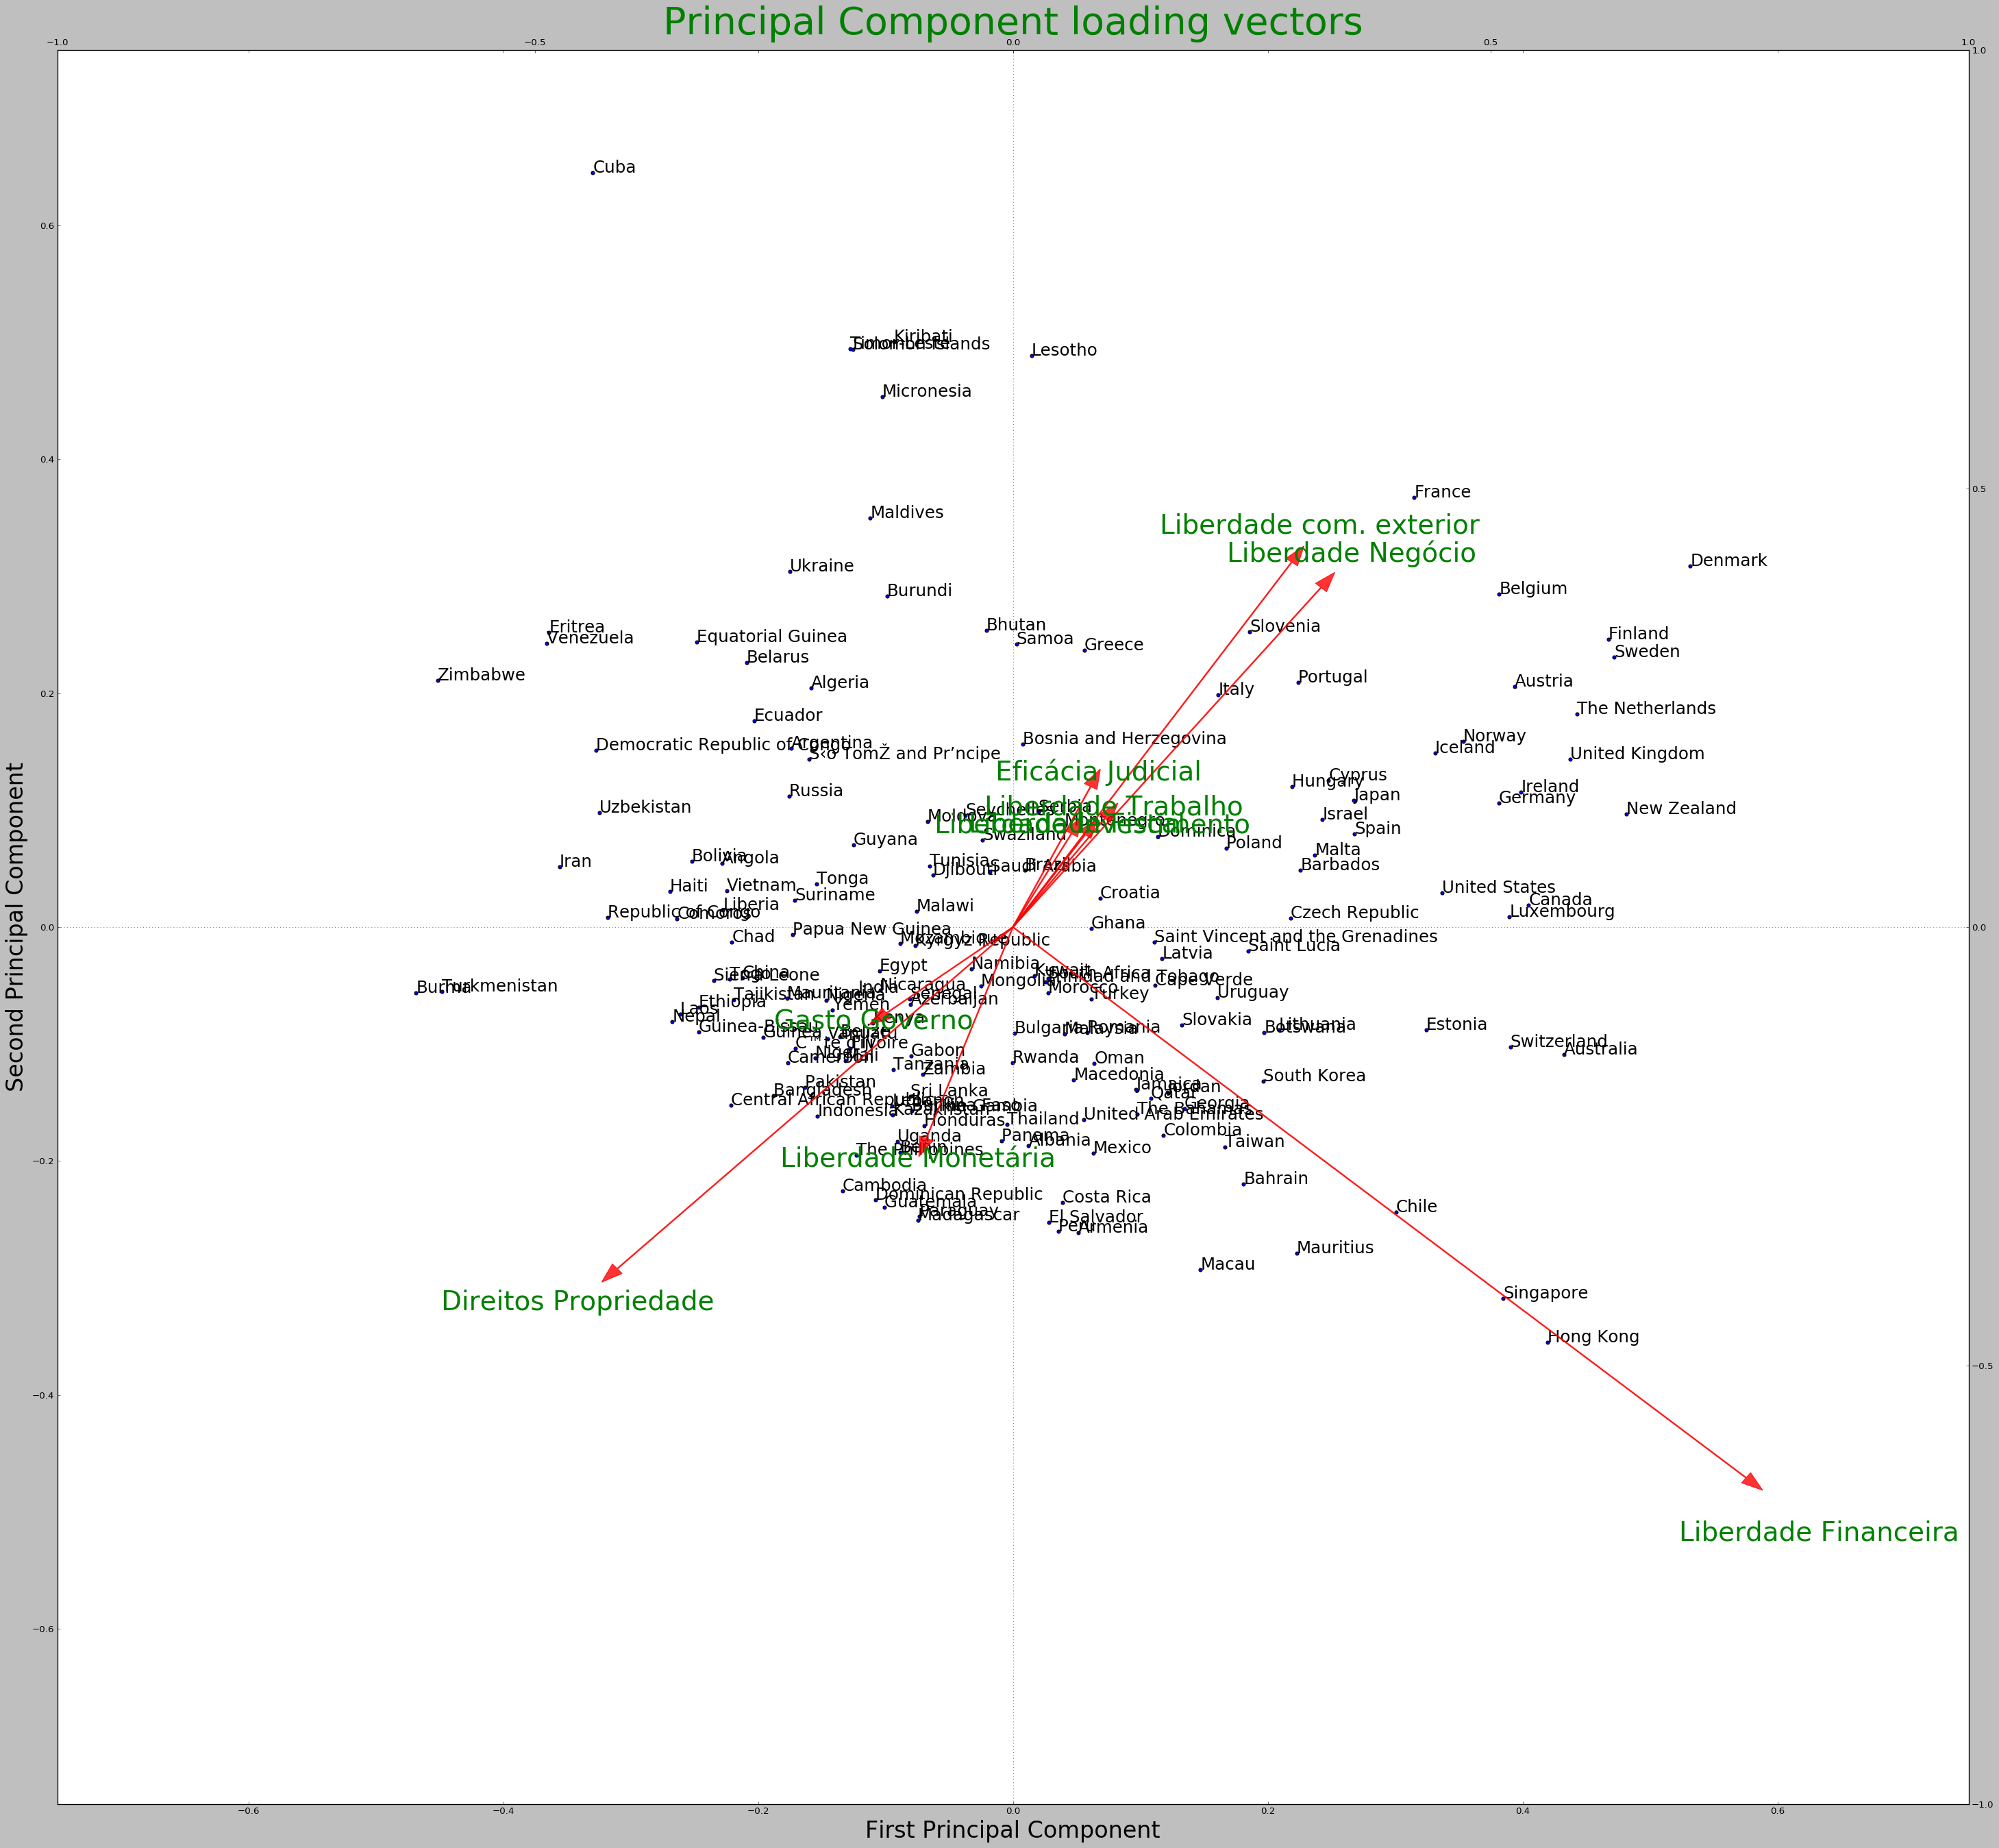

In [371]:
plt.style.use('_classic_test')

fig , ax1 = plt.subplots(figsize=(45, 40))

lim=0.75
ax1.set_xlim(-lim,lim)
ax1.set_ylim(-lim,lim)

# Plot reference lines
ax1.hlines(0,-lim,lim, linestyles='dotted', colors='grey')
ax1.vlines(0,-lim,lim, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component', fontsize=30)
ax1.set_ylabel('Second Principal Component', fontsize=30)
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='g')
ax2.set_xlabel('Principal Component loading vectors', color='g', fontsize=50)

xs = df_plot.iloc[:, 0]
ys = df_plot.iloc[:, 1]

coeff = pca.components_
labels = df.columns[2:]

scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())

ax1.scatter(xs*scalex, ys*scaley)
for i, country in enumerate(df['País']):
    ax1.annotate(country, (xs[i]*scalex, ys[i]*scaley), fontsize=22)

for i in range(pca.n_components_):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1],color='r',alpha=0.8, head_width=0.015) 
        if labels is None:
            plt.text(coeff[i, 0]* 1.1, coeff[i, 1] * 1.1, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=35)
        else:
            plt.text(coeff[i, 0]* 1.1, coeff[i, 1] * 1.1, labels[i], color='g', ha='center', va='center', fontsize=35)